In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [3]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [4]:
# relu: y = max(0, x)
# softmax: x = [x0, x1, x2], y = [e^x0/sum, e^x1/sum, e^x2/sum], sum=e^x0 + e^x1 + e^x2
 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
# (None, 784) * w + b => (None, 300), w=(784, 300), b=(300, ) 784*300+300=235500

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
# sparse_categorical_crossentropy, y:index -> one-hot -> 向量

model.compile(optimizer=keras.optimizers.SGD(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 99us/sample - loss: 2.5178 - accuracy: 0.7329 - val_loss: 0.6941 - val_accuracy: 0.7430
Epoch 2/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.5527 - accuracy: 0.7997 - val_loss: 0.5542 - val_accuracy: 0.8042
Epoch 3/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.4966 - accuracy: 0.8189 - val_loss: 0.5073 - val_accuracy: 0.8214
Epoch 4/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4618 - accuracy: 0.8318 - val_loss: 0.4635 - val_accuracy: 0.8416
Epoch 5/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4380 - accuracy: 0.8404 - val_loss: 0.4547 - val_accuracy: 0.8438
Epoch 6/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4205 - accuracy: 0.8458 - val_loss: 0.4553 - val_accuracy: 0.8436
Epoch 7/10
55000/55000 [==============================] -

In [8]:
history.history

{'loss': [2.517814048463648,
  0.5526619590412487,
  0.49664466993592005,
  0.4618383243300698,
  0.4379708119999279,
  0.4204879817139019,
  0.40356382767070426,
  0.3911504902016033,
  0.3796342136816545,
  0.3694932744806463],
 'accuracy': [0.73285455,
  0.79965454,
  0.8189091,
  0.83181816,
  0.84041816,
  0.8457636,
  0.8509273,
  0.8550909,
  0.8600364,
  0.8634727],
 'val_loss': [0.6940798177719116,
  0.5541831158638001,
  0.5073174829721451,
  0.4635099402189255,
  0.45467772176265714,
  0.4553478875875473,
  0.46075882625579834,
  0.433152947807312,
  0.4392853492498398,
  0.4290295795440674],
 'val_accuracy': [0.743,
  0.8042,
  0.8214,
  0.8416,
  0.8438,
  0.8436,
  0.8404,
  0.855,
  0.8514,
  0.855]}

In [14]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

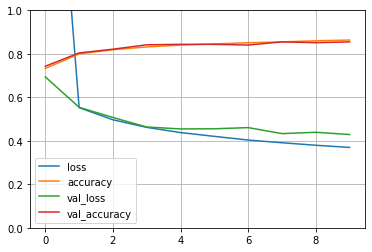

In [15]:
plt_learning_curve(history.history)

In [16]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model2.compile(optimizer=keras.optimizers.SGD(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 3.3162 - accuracy: 0.6709 - val_loss: 0.6635 - val_accuracy: 0.7608
Epoch 2/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.6455 - accuracy: 0.7579 - val_loss: 0.5869 - val_accuracy: 0.7810
Epoch 3/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.5817 - accuracy: 0.7784 - val_loss: 0.6717 - val_accuracy: 0.7514
Epoch 4/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5358 - accuracy: 0.7941 - val_loss: 0.5410 - val_accuracy: 0.8022
Epoch 5/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5075 - accuracy: 0.8032 - val_loss: 0.5301 - val_accuracy: 0.8072
Epoch 6/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4879 - accuracy: 0.8099 - val_loss: 0.5376 - val_accuracy: 0.8072
Epoch 7/10
55000/55000 [==============================

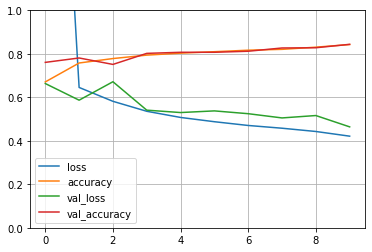

In [19]:
plt_learning_curve(history2.history)